In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv("gld_price_data.csv")
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
data_1 = pd.read_csv("gld_price_data.csv", parse_dates =["Date"],index_col = ["Date"])
data_1.head()

,SPX,GLD,USO,SLV,EUR/USD
Date,,,,,
2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692
2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491
2008-01-04,1411.630005,85.129997,77.309998,15.167,1.475492
2008-01-07,1416.180054,84.769997,75.500000,15.053,1.468299
2008-01-08,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2290 entries, 2008-01-02 to 2018-05-16
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SPX      2290 non-null   float64
 1   GLD      2290 non-null   float64
 2   USO      2290 non-null   float64
 3   SLV      2290 non-null   float64
 4   EUR/USD  2290 non-null   float64
dtypes: float64(5)
memory usage: 107.3 KB


In [5]:
data_1.isna().sum()

SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [6]:
data_1.shape

(2290, 5)

In [7]:
data_1.duplicated()

Date
2008-01-02    False
2008-01-03    False
2008-01-04    False
2008-01-07    False
2008-01-08    False
              ...  
2018-05-08    False
2018-05-09    False
2018-05-10    False
2018-05-14    False
2018-05-16    False
Length: 2290, dtype: bool

In [8]:
data_1.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
correlation = data_1.corr()

<Axes: >

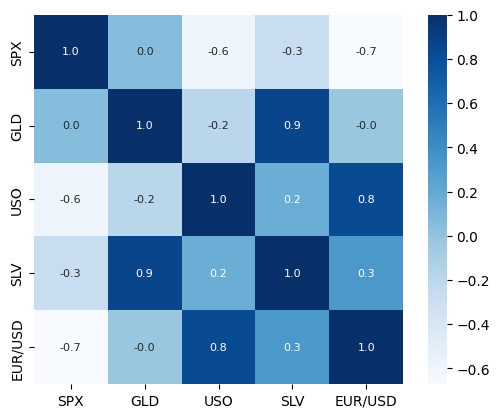

In [10]:
sns.heatmap(correlation, cbar=True , square=True , fmt = ".1f" , annot=True , annot_kws={'size':8},cmap="Blues")

In [11]:
print(correlation["GLD"])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<Axes: xlabel='Date'>

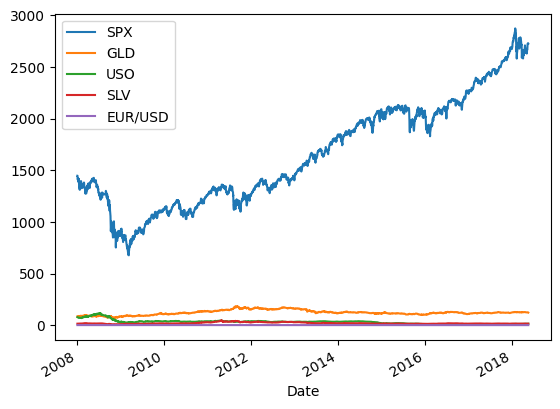

In [12]:
data_1.plot()

<Axes: xlabel='Date'>

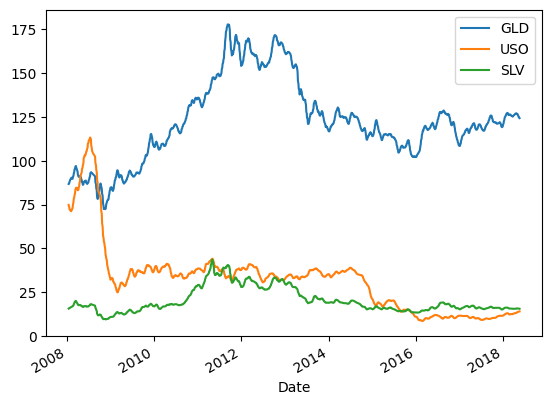

In [13]:
pd.concat([data_1[["GLD"]].rolling(12).mean(),
         data_1[["USO"]].rolling(12).mean(),
           data_1[["SLV"]].rolling(12).mean() 
          ]).plot()

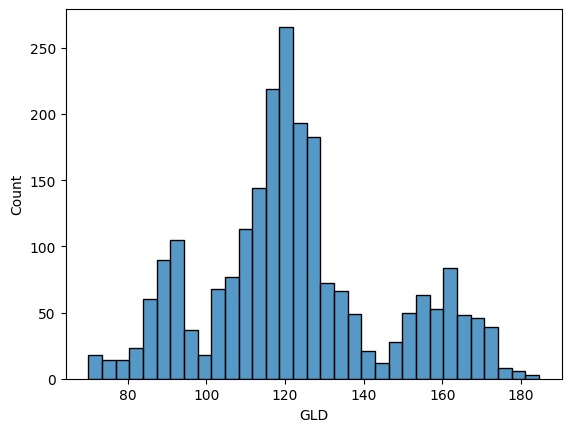

In [14]:
sns.histplot(data_1["GLD"]);

<Axes: xlabel='Date', ylabel='GLD'>

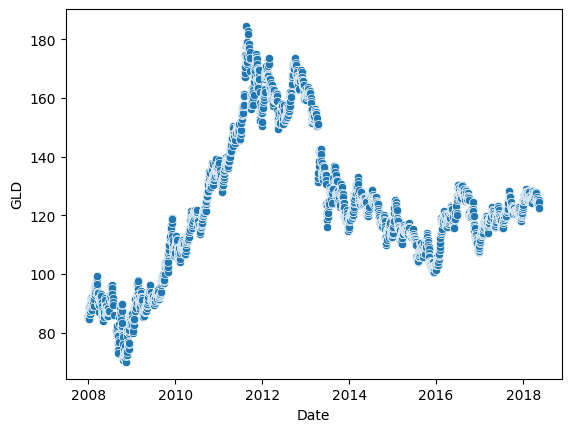

In [15]:
sns.scatterplot(x=data_1.index, y=data_1['GLD'])

<Axes: ylabel='GLD'>

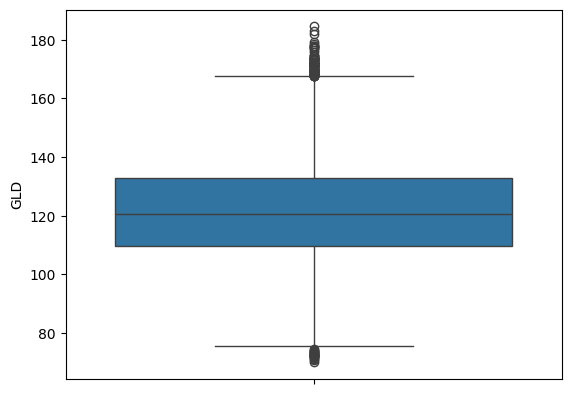

In [16]:
sns.boxplot(data=data_1,y="GLD", )

<Axes: xlabel='GLD', ylabel='EUR/USD'>

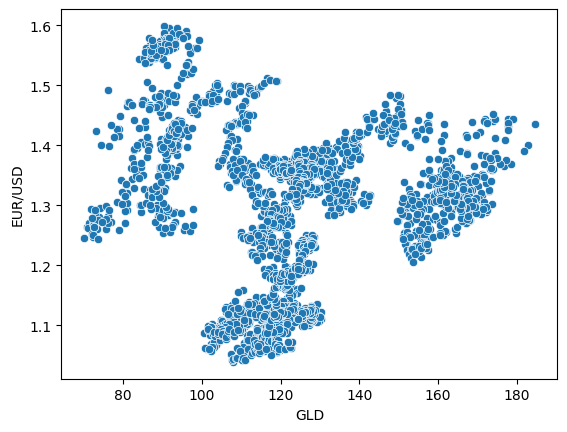

In [17]:
sns.scatterplot(x=data_1['GLD'], y=data_1['EUR/USD'])

In [18]:
X = data_1.drop(["GLD"] , axis =1)
y = data_1["GLD"]

In [19]:
X.shape , y.shape

((2290, 4), (2290,))

In [20]:
X_train , X_test , y_train ,y_test = train_test_split(X,y,test_size=0.33 , random_state=42)

In [21]:
RFRegressor = RandomForestRegressor(n_estimators=100)

In [22]:
RFRegressor.fit(X_train,y_train)

RandomForestRegressor()

In [23]:
y_pred = RFRegressor.predict(X_test)


In [24]:
print(y_pred)

[122.62720017 131.29040293 127.58840003  97.51369922 118.96140072
 114.1826992  124.73780135 117.81099982 107.84560135  98.73819975
  95.48259979 167.49949833 148.8488007  115.7683002  171.02530185
  85.24419884 124.05869896 109.80469773 112.41050064 131.37620339
 124.12509934 113.59000063 115.76900155 108.3553991  108.01439975
 125.92809952 119.87069977 112.66449893 113.3718016  126.127699
 145.97440116  89.13809998 167.60539915 114.13589953 108.18930091
 120.47540105 140.4977973  161.22120083 173.70609831 152.97860083
 119.39100056 111.30230065 121.33399949 113.74729948 122.23820059
 108.01780106  87.88759904 114.31489904 130.72880282 118.18670136
 104.26290061 130.81290331 107.17159778 160.61670496 131.53230044
 117.73529966 146.86740018 137.48830096  95.31720057 124.45880154
 114.80869977  86.11960135 104.35929967 113.61510094  84.27129957
 122.36830084 116.74939896 113.75980191 165.74430221  92.20050056
  79.35910121 160.7994018  157.76050246 106.88749977 148.76630146
 109.9661977

In [25]:
r2 = r2_score(y_test, y_pred)  
print("R² Score:", r2)

R² Score: 0.9903186097478812
